In [36]:
from numpy import *
import csv
import scipy
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
all_scores = {'Duke' : [], 'UNC' : []}
with open('all_predictions.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None) # Skip header
    for row in reader:
        all_scores['Duke'].append(int(row[0]))
        all_scores['UNC'].append(int(row[1]))
    #all_scores = list(reader)

In [54]:
outlier_rm_scores = {'Duke' : [], 'UNC' : []}
with open('outliers_removed.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None) # Skip header
    for row in reader:
        outlier_rm_scores['Duke'].append(int(row[0]))
        outlier_rm_scores['UNC'].append(int(row[1]))
    #all_scores = list(reader)

In [55]:
alldf = DataFrame(all_scores)
out_rm_df = DataFrame(outlier_rm_scores)
#print(all_df)
#print(out_rm_df)

In [56]:
print(alldf)

    Duke  UNC
0     58   73
1     67   68
2     61   70
3     71   66
4     68   75
5     62   57
6     43   54
7     53   68
8     71   79
9     63   68
10    69   69
11    47   69
12    65   73
13    71   66
14    75   65
15   169    1
16    72   81
17   100    0
18    61   71
19    66   68
20    70   80
21    67   65
22    62   51


In [71]:
alldf.describe()

,Duke,UNC
count,23.000000,23.000000
mean,70.043478,62.478261
std,24.146293,20.880329
min,43.000000,0.000000
25%,61.500000,65.000000
50%,67.000000,68.000000
75%,71.000000,72.000000
max,169.000000,81.000000


In [72]:
out_rm_df.describe()

,Duke,UNC
count,21.000000,21.000000
mean,63.904762,68.380952
std,8.203077,7.671220
min,43.000000,51.000000
25%,61.000000,66.000000
50%,66.000000,68.000000
75%,70.000000,73.000000
max,75.000000,81.000000


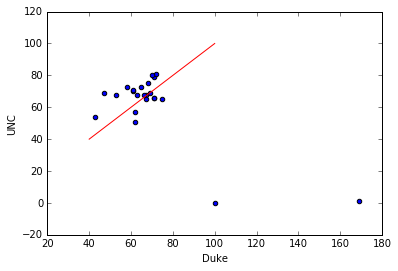

In [60]:
alldf.plot(kind="scatter", x='Duke', y='UNC')
plt.plot([40,100],[40,100], 'r-')
plt.show()

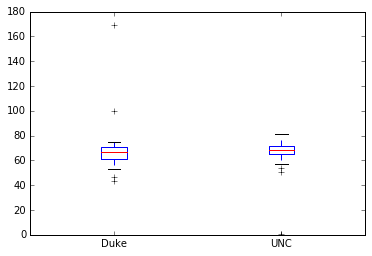

In [65]:
alldf.plot(kind="box")

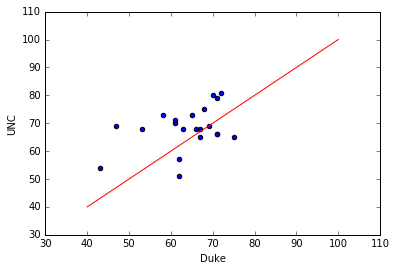

In [78]:
out_rm_df.plot(kind="scatter", x='Duke', y='UNC')
plt.plot([40,100],[40,100], 'r-')
plt.show()

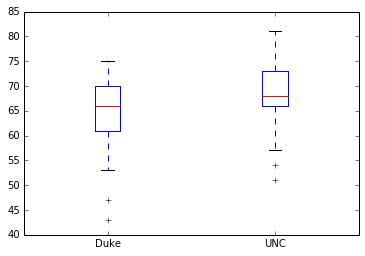

In [79]:
out_rm_df.plot(kind="box")

In [80]:
duke_minus_unc = alldf["Duke"] - alldf["UNC"]
concat([alldf, duke_minus_unc], axis=1)

,Duke,UNC,0
0,58,73,-15
1,67,68,-1
2,61,70,-9
3,71,66,5
4,68,75,-7
5,62,57,5
6,43,54,-11
7,53,68,-15
8,71,79,-8
9,63,68,-5


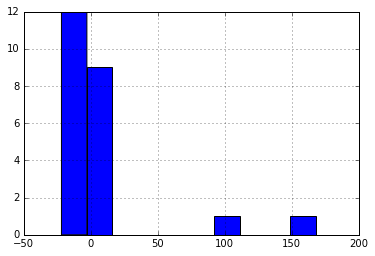

In [81]:
duke_minus_unc.hist()

In [82]:
duke_minus_unc = out_rm_df["Duke"] - out_rm_df["UNC"]
concat([out_rm_df, duke_minus_unc], axis=1)

,Duke,UNC,0
0,58,73,-15
1,67,68,-1
2,61,70,-9
3,71,66,5
4,68,75,-7
5,62,57,5
6,43,54,-11
7,53,68,-15
8,71,79,-8
9,63,68,-5


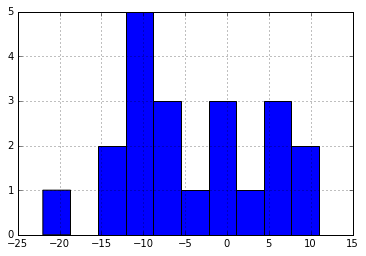

In [83]:
duke_minus_unc.hist()